<a href="https://colab.research.google.com/github/JosephRidge/prep/blob/feature-nfl-analysis/NFL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Analysis of Scoring in the NFL**

The file **ScoringNFL** contains the points scored by each
National Football League team for 10 seasons.

*  NFL leadership is interested in seeing how the **distribution of scoring across the league has changed over these 10 seasons**.
> Construct a single chart that allows the
audience to make these comparisons. Provide a thorough discussion of the
distribution of scoring in the league over this decade.
*  NFL leadership is also interested in the **temporal patterns** in **scoring for individual teams**.
> Unstack the data and use **sparklines** to show how scoring for each team has
changed over these 10 seasons.
> - List a team with a **strong upward** trend over these 10 seasons.
> - List a team with a **strong downward** trend over these 10 seasons

# **Methodology(Crisp-DM)**

> **Business Understanding:**
- *What Does the business need?*
- Understand performance of NFL league teams through scoring patterns over 10 seasons

> **Data Understanding:**
- *What do we have/ need? Is it clean?*

> **Data Preparation:**
- *How do we organize the data for modeling*

> **Modeling:**
- *Target modeling technique to apply*

> **Model Evaluation:**
- *Which Model is best*

> **Deployment:**
- *Making it accessible to stakeholder*



# Import Libraries

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import requests
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [155]:
nfl_df = pd.read_csv("https://raw.githubusercontent.com/JosephRidge/prep/main/ScoringNFL.csv")
nfl_df

,Team,Season,Points Scored
0,Baltimore Ravens,2010,357
1,San Francisco 49ers,2010,305
2,Tampa Bay Buccaneers,2010,341
3,New Orleans Saints,2010,384
4,Kansas City Chiefs,2010,366
...,...,...,...
315,Denver Broncos,2019,282
316,Chicago Bears,2019,280
317,Cincinnati Bengals,2019,279
318,New York Jets,2019,276


# **Data Understanding**
- Shape
- Data types
- Missing Values
- Outliers
- Descriptive stats
- Exploration (Univariate & Bivariate Analysis)

In [156]:
# Shape
nfl_df.shape

(320, 3)

### **Deduction:**
> Data Contains **320 rows** and **3 columns/features**. The data exceeds the basic threshold sample-size of 30 hence deemed as a large sample size.

In [157]:
# Data types
nfl_df.dtypes

Team             object
Season            int64
Points Scored     int64
dtype: object

### **Note:**

> In Statistics their exists two main types of data:
- Categorical
- Numerical

In the above situation we have Object and Numerical data, hence we transform the Team feature/ column to categorical type.

In [158]:
# convert Team Column type to Categorical
nfl_df['Team'] = nfl_df['Team'].astype('category')
# convert Season Column type to date-time
nfl_df['Season'] = pd.to_datetime(nfl_df['Season'], format='%Y')
nfl_df['Season'] = nfl_df['Season'].dt.year

In [159]:
# Data types
nfl_df.dtypes

Team             category
Season              int64
Points Scored       int64
dtype: object

### **Deduction:**
> Data Contains three columns (containing Numerical and Categorical data types):
- Team with data type being object(Categorical)
- Season with data type being datetime
- Points Scored with data type being integer(Numerical)

In [160]:
# Descriptive stats -Numerical
nfl_df.describe()

,Season,Points Scored
count,320.00000,320.000000
mean,2014.50000,362.290625
std,2.87678,70.133012
min,2010.00000,193.000000
25%,2012.00000,311.500000
50%,2014.50000,361.000000
75%,2017.00000,406.000000
max,2019.00000,606.000000


### **Deduction:**
Data Contains Two Numrical columns:

> Points Scored
- There exists a large **Standard Deviation**, this implys presence of outlier in data set
- **Lowest score** in the 10 seasons was **193**
- **Highest score** in the 10 seasons was **606**

> Season:
- **First Season** started in 2010
- **Last Season** ended in 2019

In [161]:
# Descriptive stats - Categorical
nfl_df.describe(include='category')

,Team
count,320
unique,32
top,Arizona Cardinals
freq,10


In [162]:
nfl_df['Team'].value_counts()

Arizona Cardinals       10
Atlanta Falcons         10
Tennessee Titans        10
Tampa Bay Buccaneers    10
Seattle Seahawks        10
San Francisco 49ers     10
Pittsburgh Steelers     10
Philadelphia Eagles     10
Oakland Raiders         10
New York Jets           10
New York Giants         10
New Orleans Saints      10
New England Patriots    10
Minnesota Vikings       10
Miami Dolphins          10
Los Angeles Rams        10
Los Angeles Chargers    10
Kansas City Chiefs      10
Jacksonville Jaguars    10
Indianapolis Colts      10
Houston Texans          10
Green Bay Packers       10
Detroit Lions           10
Denver Broncos          10
Dallas Cowboys          10
Cleveland Browns        10
Cincinnati Bengals      10
Chicago Bears           10
Carolina Panthers       10
Buffalo Bills           10
Baltimore Ravens        10
Washington Redskins     10
Name: Team, dtype: int64

### **Deduction:**
- There are **32** unique **teams**
- **320** **games** in total
- **Each team** has played **10 games**

## Missing Value Identification

In [163]:
# Missing Values
print("Null Values Present in Data(%)")
print(nfl_df.isna().sum() * 100 / len(nfl_df))

Null Values Present in Data(%)
Team             0.0
Season           0.0
Points Scored    0.0
dtype: float64


### **Deduction:**
- No Missing values

## Outlier Detection

In [164]:
# Calculating the Z-Score to attain the outliers

# Calculate mean and standard deviation
mean_value = nfl_df['Points Scored'].mean()
std_dev = nfl_df['Points Scored'].std()

# Calculate Z-scores for each data point
z_scores = (nfl_df['Points Scored'] - mean_value) / std_dev

# Define a threshold for identifying outliers (commonly set at |Z| > 3)
threshold = 3

# Identify outliers
outliers = nfl_df['Points Scored'][abs(z_scores) > threshold]

# Print or visualize outliers
print("Outliers:")
print(outliers)


Outliers:
123    606
Name: Points Scored, dtype: int64


Season              Axes(0.125,0.653529;0.227941x0.226471)
Points Scored    Axes(0.398529,0.653529;0.227941x0.226471)
dtype: object

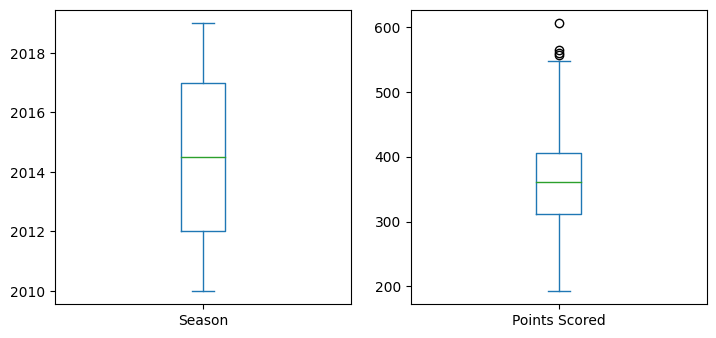

In [165]:
# Box and whisker plots
nfl_df.plot(kind='box', layout = (3,3),subplots=True, sharex=False, sharey=False,figsize = (13,13))

### **Deduction:**
- There exist outliers based on the above Box plot, the outliers lie approximately above 540 points scored.
- The outlier value is 606

> Probable Causes of Outlier Occurence:
  - Natural Variation (Natural Occurence)
  - Data entry and measurement errors
  - Sampling problems    



## Data Exploration
- Univariate Analysis
- Bivariate Analysis

<Axes: title={'center': 'Density Plot of Points Scored'}, ylabel='Density'>

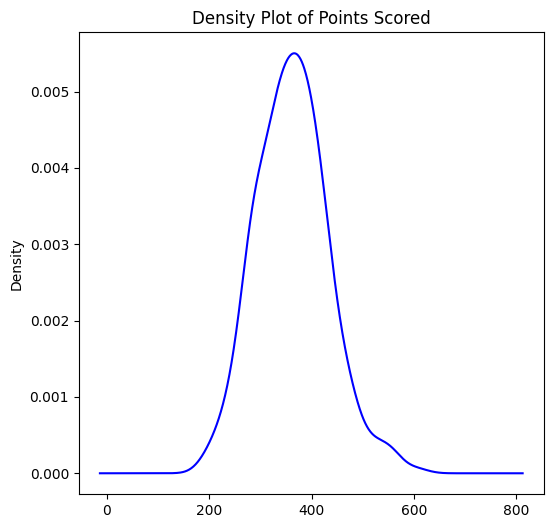

In [166]:
# Univariate Analysis - Numerical Data ( hist & Density Plot)
# Density Plots
nfl_df['Points Scored'].plot(kind='density', figsize = (6,6), title="Density Plot of Points Scored", color='blue')


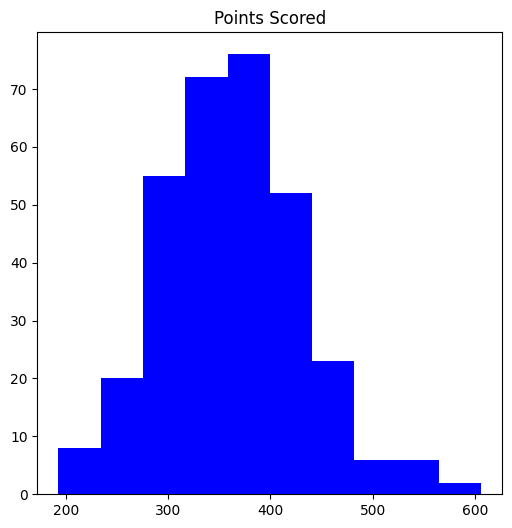

In [167]:
# Histogram of the variables
nfl_df['Points Scored'].hist(figsize = (6,6), color='blue')
plt.title("Points Scored")
plt.grid(False)
plt.show()

### **Deduction:**
-  Most scores fall between 200 and 600
-  Skewed towards the right


In [168]:
nfl_df

,Team,Season,Points Scored
0,Baltimore Ravens,2010,357
1,San Francisco 49ers,2010,305
2,Tampa Bay Buccaneers,2010,341
3,New Orleans Saints,2010,384
4,Kansas City Chiefs,2010,366
...,...,...,...
315,Denver Broncos,2019,282
316,Chicago Bears,2019,280
317,Cincinnati Bengals,2019,279
318,New York Jets,2019,276


<Axes: xlabel='Season', ylabel='Points Scored'>

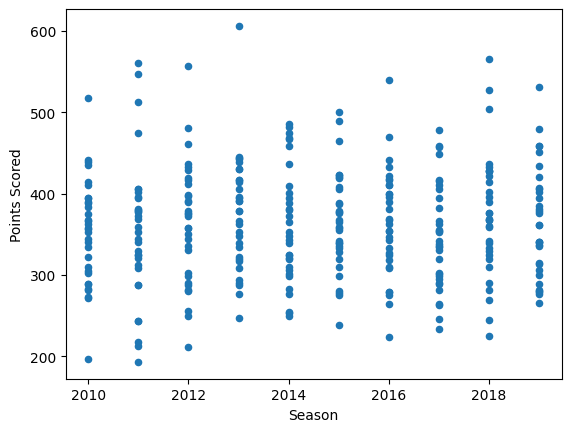

In [169]:
# Bi-variate Analysis - two variables at the same time eg using correlation matrix

# Scatter Plot
nfl_df.reset_index().plot.scatter(x = 'Season', y = 'Points Scored')

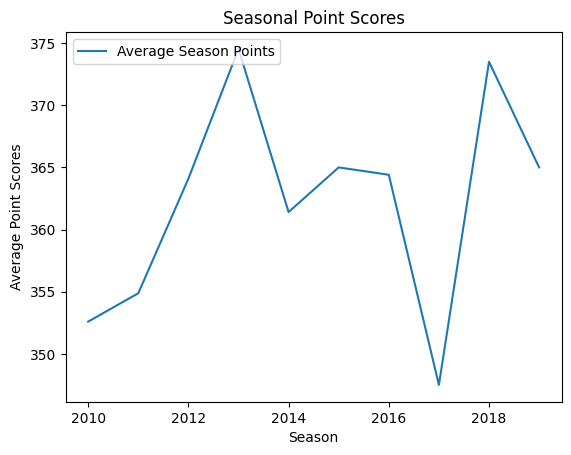

In [170]:
# Getting  the average of the scores based on the year
average_points_per_year = nfl_df.groupby('Season')['Points Scored'].mean()

# Create a new DataFrame for average points
average_points_df = pd.DataFrame({'Average Season Points': average_points_per_year})

average_points_df.plot(title="Seasonal Point Scores", ylabel="Average Point Scores")

# Move the legend to the right
plt.legend(loc='upper left')


### **Discussion:**
- **Highest scores** were in **2013**
- **Lowest Scores** were in  **2017**
- Between **2010 and 2013** the **points scored** were gradually **incrementing**
- **gradual decline** in score commenced at the start of **2014 season** and **increased in 2018**
- There exist no correlation between season


NFL leadership is also interested in the temporal patterns in scoring for individual teams

In [ ]:
# Group by 'Team'
points_per_team = nfl_df.groupby('Team')

#  subplots
# fig, axes = plt.subplots(nrows=len(points_per_team), ncols=1, figsize=(8, 6))

# Plot each team's points
for  team_name, team_data in points_per_team :
    # team_data.plot(  x='Team', y='Points Scored', kind='line', title=team_name, ylabel="Points Scored")
    # axes[i].legend([team_name])  # Place legend with the team name
    plt.plot( team_data['Points Scored'])
    plt.show()


In [208]:
points_per_team


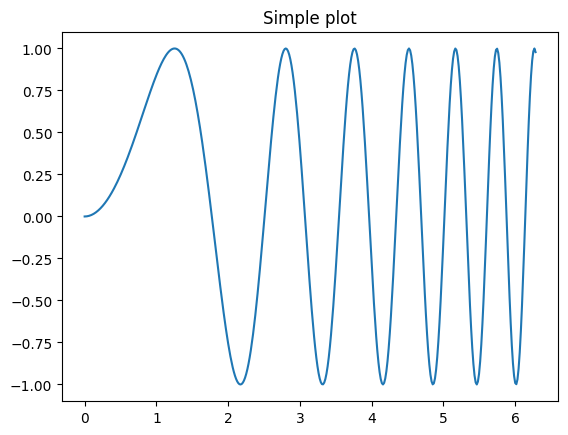

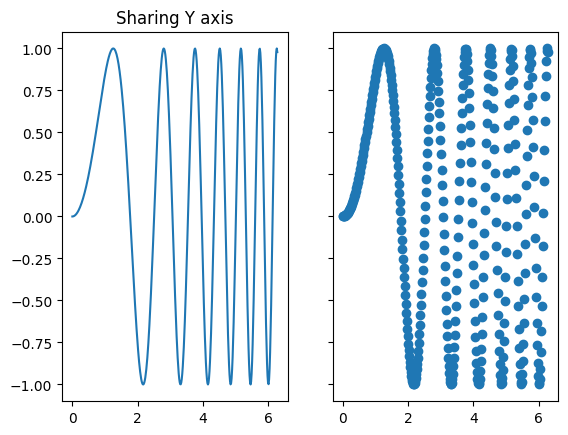

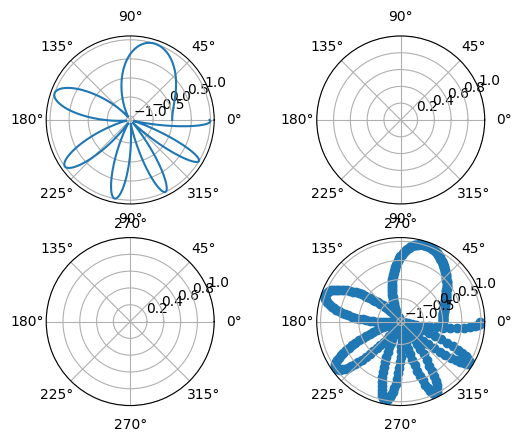

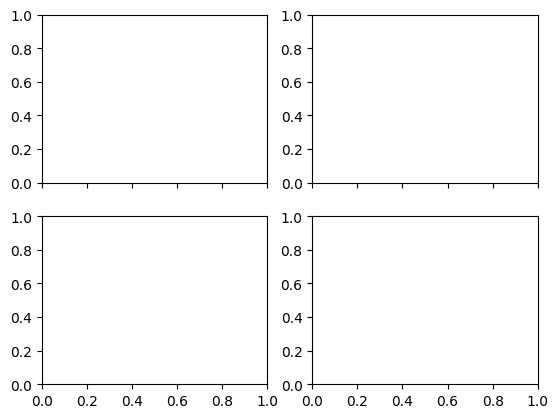

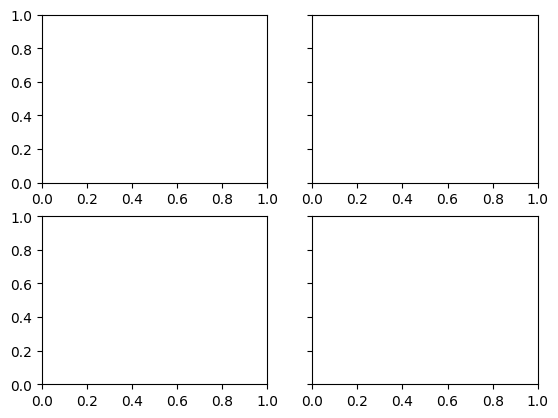

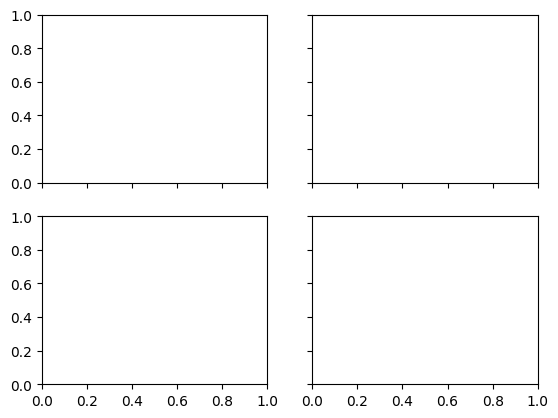

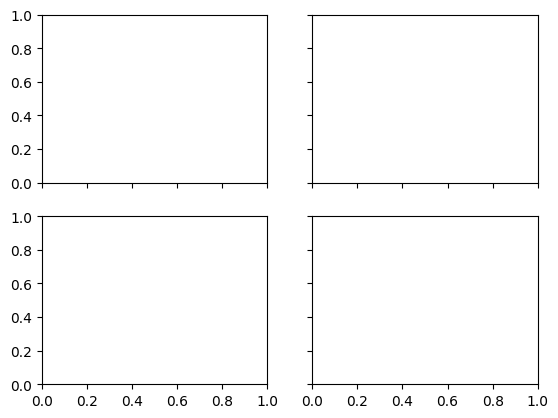

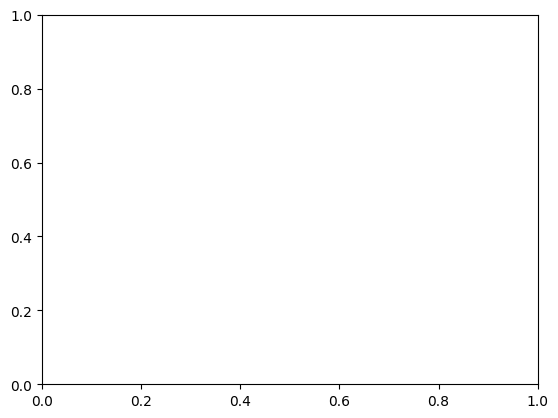

In [203]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)


# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

In [174]:
points_per_team